In [1]:
# Sales Data Analysis Project
# Dataset Source: https://www.kaggle.com/datasets/vivek468/superstore-dataset-final

In [32]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [33]:
# Load Dataset

# Specify Windows-1252 encoding to correctly handle special characters
df = pd.read_csv("Superstore.csv", encoding="windows-1252") 

print("Dataset Loaded")
#print(df.head())   # Optional 

Dataset Loaded


In [49]:
# Basic Data Cleaning
df["Sales"] = df["Sales"].fillna(df["Sales"].mean())

df["Order Date"] = pd.to_datetime(df["Order Date"], errors="coerce")
df = df.dropna(subset=["Order Date"])

df["Month"] = df["Order Date"].dt.month_name()


In [50]:
# Total and Average Sales Calculation
total_sales = df["Sales"].sum()
average_sales = df["Sales"].mean()

print("\nSales Summary")
print("Total Sales:", round(total_sales, 2))
print("Average Sales:", round(average_sales, 2))


Sales Summary
Total Sales: 2297200.86
Average Sales: 229.86


In [51]:
# Monthly and Category Wise Sales Analysis
monthly_sales = df.groupby("Month")["Sales"].sum()
category_sales = df.groupby("Category")["Sales"].sum()

In [52]:
# Identify Top Performing Product and Category
top_category = category_sales.idxmax()
top_product = df.groupby("Product Name")["Sales"].sum().idxmax()


print("\nTop Performers")
print("Top Category:", top_category)
print("Top Product:", top_product)


Top Performers
Top Category: Technology
Top Product: Canon imageCLASS 2200 Advanced Copier


# Visualizations

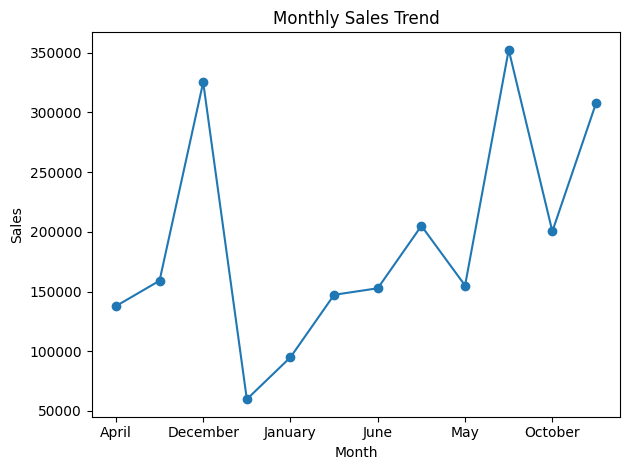

In [53]:
# Line Chart for Monthly Sales Trend 
plt.figure()
monthly_sales.plot(kind="line", marker="o")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

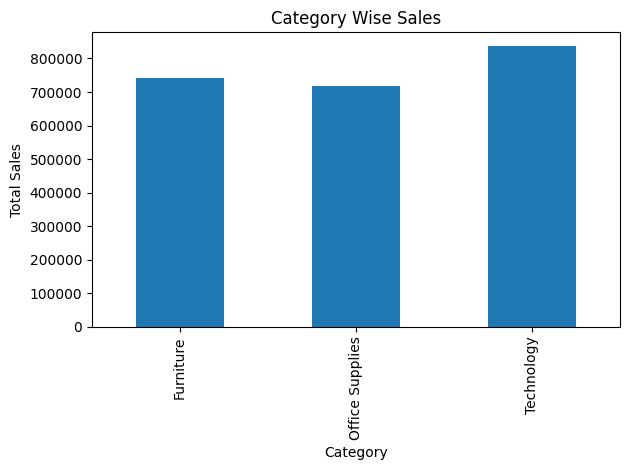

In [54]:
# Bar Chart for Category Wise Sales 
plt.figure()
category_sales.plot(kind="bar")
plt.title("Category Wise Sales")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

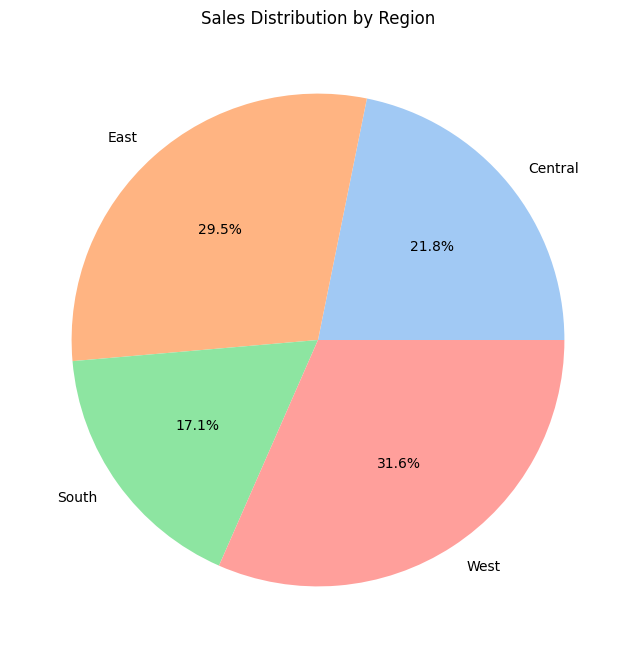

In [55]:
# Pie Chart for Sales by Region 
region_sales = df.groupby("Region")["Sales"].sum()

plt.figure(figsize=(8, 8))
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title("Sales Distribution by Region")
plt.show()

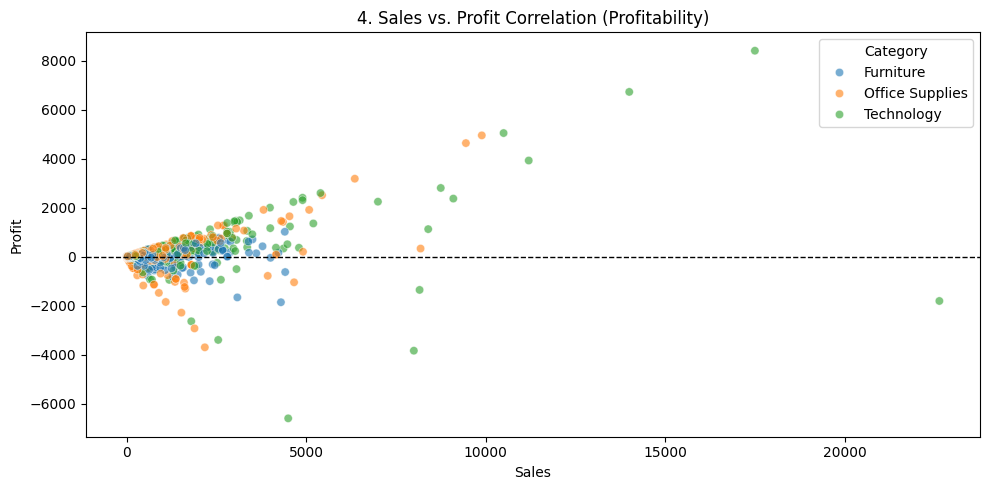

In [56]:
#Sales vs Profit (Business Health)
# This is crucial to find products that sell well but lose money
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Category', alpha=0.6)
plt.title("4. Sales vs. Profit Correlation (Profitability)")
plt.axhline(0, color='black', linestyle='--', linewidth=1) # Zero profit line
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.tight_layout()
plt.show()

In [57]:
# Summary Output
print("\nFinal Insights")
print("Highest sales category:", top_category)
print("Best selling product:", top_product)
print("Month with highest sales:", monthly_sales.idxmax())
print("Month with lowest sales:", monthly_sales.idxmin())


Final Insights
Highest sales category: Technology
Best selling product: Canon imageCLASS 2200 Advanced Copier
Month with highest sales: November
Month with lowest sales: February
